In [1]:
import glob
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Load results

In [2]:
model_names = [os.path.basename(path) for path in glob.glob('models/*')]
print(model_names)

['128_128_3_mobilenetv2', '160_160_3_mobilenetv2', '96_96_3_mobilenetv2']


In [3]:
predictions = pd.read_csv('results/predictions.csv', sep=',')
predictions.head()

,Unnamed: 0,path,set,truth,96_96_3_mobilenetv2,128_128_3_mobilenetv2,160_160_3_mobilenetv2
0,0,negative/2017-08-28_09-30-00-1_500_dirty_glass...,train,0,0.001683,0.009257,0.162872
1,1,negative/2017-08-28_09-30-00-1_500_dirty_glass...,train,0,0.000122,0.091957,0.394174
2,2,negative/2017-08-28_09-30-00-1_500_dirty_glass...,train,0,0.000112,0.000017,0.043899
3,3,negative/2017-08-28_09-30-00-1_500_dirty_glass...,train,0,0.000253,0.000012,0.956607
4,4,negative/2017-08-28_09-30-00-1_500_dirty_glass...,train,0,0.000037,0.000023,0.000004


In [4]:
predictions_quantized = pd.read_json('results/predictions_quantized.json')
predictions_quantized.head()

,path,set,truth,96_96_3_mobilenetv2,160_160_3_mobilenetv2,128_128_3_mobilenetv2
0,data/train/positive/2017-09-20_19-24-55.mp4-be...,train,1,0.996094,0.996094,0.996094
1,data/train/positive/2017-08-28_09-30-00-1_500_...,train,1,0.996094,0.996094,0.996094
2,data/train/positive/2017-08-28_09-30-00-1_500_...,train,1,0.996094,0.996094,0.996094
3,data/train/positive/2017-09-20_19-24-55.mp4-be...,train,1,0.996094,0.996094,0.996094
4,data/train/positive/2017-09-20_19-24-55.mp4-be...,train,1,0.996094,0.996094,0.996094


In [5]:
predictions_edgetpu = pd.read_json('results/predictions_edgetpu.json')
predictions_edgetpu.head()

,path,set,truth,128_128_3_mobilenetv2,96_96_3_mobilenetv2,160_160_3_mobilenetv2
0,data/train/positive/2017-09-01_10-54-26.mp4-be...,train,1,0.996094,0.996094,0.996094
1,data/train/positive/2017-09-20_19-24-55.mp4-be...,train,1,0.996094,0.996094,0.996094
2,data/train/positive/2017-10-17_1-39-36.mp4-bee...,train,1,0.996094,0.996094,0.996094
3,data/train/positive/2017-09-20_19-24-55.mp4-be...,train,1,0.996094,0.996094,0.996094
4,data/train/positive/2017-08-30_15-42-59.mp4-be...,train,1,0.996094,0.996094,0.996094


In [5]:
inference_times_quantized = pd.read_json('results/inference_times_quantized.json')
inference_times_quantized.head()

,96_96_3_mobilenetv2,160_160_3_mobilenetv2,128_128_3_mobilenetv2
0,33.420086,76.441765,50.642014
1,30.965805,72.186947,48.214436
2,30.735970,72.305441,47.891617
3,30.173302,72.217226,48.357010
4,30.127525,72.147131,47.971964


In [6]:
inference_times_edgetpu = pd.read_json('results/inference_times_edgetpu.json')
inference_times_edgetpu.head()

,128_128_3_mobilenetv2,96_96_3_mobilenetv2,160_160_3_mobilenetv2
0,9.299836,9.480799,9.100636
1,1.308491,1.309330,1.884615
2,1.366931,1.130049,1.756575
3,1.232770,1.128610,1.914616
4,1.230850,1.128010,1.752855


# Classification examples

In [39]:
predictions[(predictions['160_160_3_mobilenetv2'] > 0.5) & (predictions['set'] == 'test')]

,Unnamed: 0,path,set,truth,96_96_3_mobilenetv2,128_128_3_mobilenetv2,160_160_3_mobilenetv2
6459,6459,negative/2017-08-28_09-30-00-1_500_dirty_glass...,test,0,0.000248,0.000039,0.950737
6460,6460,negative/2017-08-28_09-30-00-1_500_dirty_glass...,test,0,0.999899,0.161927,0.873718
6463,6463,negative/2017-08-28_09-30-00-1_500_dirty_glass...,test,0,0.000864,0.000095,0.899218
6465,6465,negative/2017-08-28_09-30-00-1_500_dirty_glass...,test,0,0.000040,0.000036,0.847103
6467,6467,negative/2017-08-28_09-30-00-1_500_dirty_glass...,test,0,0.999914,0.935576,0.999983
...,...,...,...,...,...,...,...
7595,7595,positive/2017-10-17_16-41-10.mp4-bee_id_7307-1...,test,1,0.999987,0.999996,1.000000
7596,7596,positive/2017-10-17_16-41-10.mp4-bee_id_7310-1...,test,1,0.999984,1.000000,1.000000
7598,7598,positive/2017-10-17_16-41-10.mp4-bee_id_7322-1...,test,1,0.999981,1.000000,1.000000
7600,7600,positive/2017-10-17_16-41-10.mp4-bee_id_7363-1...,test,1,1.000000,1.000000,1.000000


## Positive

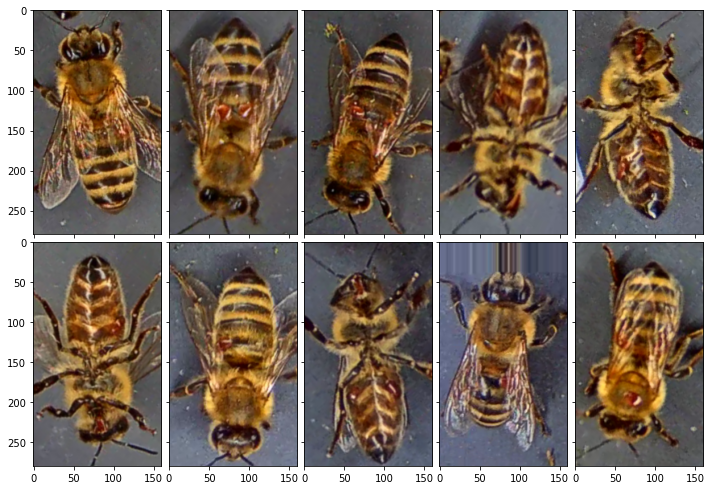

In [45]:
image_paths = predictions['path'][(predictions['160_160_3_mobilenetv2'] > 0.5) & (predictions['set'] == 'test')].sample(10)

fig = plt.figure(figsize=(12, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5),  axes_pad=0.1)
for ax, im_path in zip(grid, image_paths[:12]):
    im = Image.open('data/test/' + im_path)
    ax.imshow(im)

In [46]:
fig.savefig('results/pictures/samples_positive.png', dpi=200, bbox_inches='tight')

## Negative

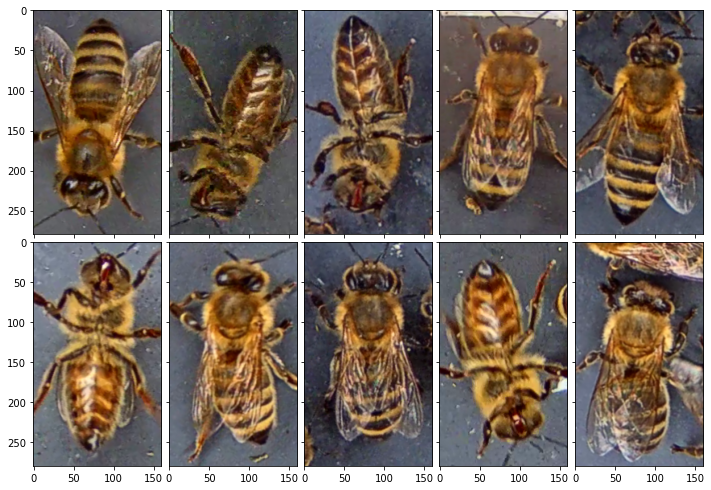

In [47]:
image_paths = predictions['path'][(predictions['160_160_3_mobilenetv2'] <= 0.5) & (predictions['set'] == 'test')].sample(10)

fig = plt.figure(figsize=(12, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5),  axes_pad=0.1)
for ax, im_path in zip(grid, image_paths[:12]):
    im = Image.open('data/test/' + im_path)
    ax.imshow(im)

In [48]:
fig.savefig('results/pictures/samples_negative.png', dpi=200, bbox_inches='tight')

# Metrics

In [50]:
def calculate_metrics(truths, predictions):
    scores = {
        'loss': keras.metrics.BinaryCrossentropy()(truths, predictions).numpy(),
        'accuracy': keras.metrics.BinaryAccuracy()(truths, predictions).numpy(),
        'precision': keras.metrics.Precision()(truths, predictions).numpy(),
        'recall': keras.metrics.Recall()(truths, predictions).numpy(),
        'tp': keras.metrics.TruePositives()(truths, predictions).numpy(),
        'fn': keras.metrics.FalseNegatives()(truths, predictions).numpy(),
        'tn': keras.metrics.TrueNegatives()(truths, predictions).numpy(),
        'fp': keras.metrics.FalsePositives()(truths, predictions).numpy(),
        'auc': keras.metrics.AUC()(truths, predictions).numpy()
    }
    return scores

def evaluate_predictions(predictions, model_names):
    all_metrics = []
    for split in ['train', 'validation', 'test']:
        set_predictions = predictions.loc[predictions['set'] == split]
        for model_name in model_names:
            metrics = calculate_metrics(set_predictions['truth'], set_predictions[model_name])
            metrics['model'] = model_name
            metrics['set'] = split
            all_metrics.append(metrics)
    return pd.DataFrame(all_metrics)

In [56]:
evals = evaluate_predictions(predictions, model_names)
evals

,loss,accuracy,precision,recall,tp,fn,tn,fp,auc,model,set
0,0.173378,0.965783,0.962899,0.984416,3348.0,53.0,1789.0,129.0,0.984500,160_160_3_mobilenetv2,train
1,0.276117,0.962211,0.973373,0.967363,3290.0,111.0,1828.0,90.0,0.973805,128_128_3_mobilenetv2,train
2,0.259749,0.947359,0.954030,0.964128,3279.0,122.0,1760.0,158.0,0.972439,96_96_3_mobilenetv2,train
3,0.307204,0.955185,0.950732,0.980769,714.0,14.0,373.0,37.0,0.972191,160_160_3_mobilenetv2,validation
4,0.375565,0.955185,0.965612,0.964286,702.0,26.0,385.0,25.0,0.963328,128_128_3_mobilenetv2,validation
5,0.324056,0.949033,0.955163,0.965659,703.0,25.0,377.0,33.0,0.962512,96_96_3_mobilenetv2,validation
6,0.334531,0.944105,0.939394,0.975376,713.0,18.0,368.0,46.0,0.969549,160_160_3_mobilenetv2,test
7,0.433788,0.944105,0.954980,0.957592,700.0,31.0,381.0,33.0,0.957044,128_128_3_mobilenetv2,test
8,0.391999,0.924891,0.935223,0.948016,693.0,38.0,366.0,48.0,0.953302,96_96_3_mobilenetv2,test


In [57]:
evals.to_csv('results/prediction_scores.csv')

In [51]:
evals_quantized = evaluate_predictions(predictions_quantized, model_names)
evals_quantized

,loss,accuracy,precision,recall,tp,fn,tn,fp,auc,model,set
0,0.153918,0.964655,0.959920,0.985887,3353.0,48.0,1778.0,140.0,0.983297,160_160_3_mobilenetv2,train
1,0.300408,0.962023,0.973085,0.967363,3290.0,111.0,1827.0,91.0,0.971458,128_128_3_mobilenetv2,train
2,0.316155,0.949239,0.957882,0.962952,3275.0,126.0,1774.0,144.0,0.973138,96_96_3_mobilenetv2,train
3,0.224027,0.956063,0.952000,0.980769,714.0,14.0,374.0,36.0,0.971770,160_160_3_mobilenetv2,validation
4,0.378817,0.956063,0.963115,0.968407,705.0,23.0,383.0,27.0,0.959758,128_128_3_mobilenetv2,validation
5,0.344670,0.951670,0.957823,0.967033,704.0,24.0,379.0,31.0,0.962842,96_96_3_mobilenetv2,validation
6,0.257036,0.942358,0.935780,0.976744,714.0,17.0,365.0,49.0,0.970132,160_160_3_mobilenetv2,test
7,0.420307,0.943231,0.952446,0.958960,701.0,30.0,379.0,35.0,0.959130,128_128_3_mobilenetv2,test
8,0.404213,0.929258,0.939189,0.950752,695.0,36.0,369.0,45.0,0.953635,96_96_3_mobilenetv2,test


In [52]:
evals_quantized.to_csv('results/prediction_scores_quantized.csv')

In [53]:
evals_edgetpu = evaluate_predictions(predictions_edgetpu, model_names)
evals_edgetpu

,loss,accuracy,precision,recall,tp,fn,tn,fp,auc,model,set
0,0.148140,0.965783,0.961836,0.985592,3352.0,49.0,1785.0,133.0,0.984068,160_160_3_mobilenetv2,train
1,0.301322,0.962399,0.973661,0.967363,3290.0,111.0,1829.0,89.0,0.971164,128_128_3_mobilenetv2,train
2,0.311586,0.948863,0.958126,0.962070,3272.0,129.0,1775.0,143.0,0.972614,96_96_3_mobilenetv2,train
3,0.223974,0.956063,0.953209,0.979396,713.0,15.0,375.0,35.0,0.971815,160_160_3_mobilenetv2,validation
4,0.380321,0.953427,0.960437,0.967033,704.0,24.0,381.0,29.0,0.959228,128_128_3_mobilenetv2,validation
5,0.335439,0.952548,0.959128,0.967033,704.0,24.0,380.0,30.0,0.962807,96_96_3_mobilenetv2,validation
6,0.259430,0.944978,0.940633,0.975376,713.0,18.0,369.0,45.0,0.971352,160_160_3_mobilenetv2,test
7,0.421834,0.946725,0.955163,0.961696,703.0,28.0,381.0,33.0,0.957890,128_128_3_mobilenetv2,test
8,0.410202,0.928384,0.939107,0.949384,694.0,37.0,369.0,45.0,0.954747,96_96_3_mobilenetv2,test


In [55]:
evals_edgetpu.to_csv('results/prediction_scores_edgetpu.csv')

In [12]:
evals.drop(['model', 'set'], axis=1) - evals_quantized.drop(['model', 'set'], axis=1)

,loss,accuracy,precision,recall,tp,fn,tn,fp,auc
0,-0.056406,-0.001880,-0.003853,0.001176,4.0,-4.0,-14.0,14.0,-0.000699
1,-0.024291,0.000188,0.000288,0.000000,0.0,0.0,1.0,-1.0,0.002347
2,0.019460,0.001128,0.002979,-0.001470,-5.0,5.0,11.0,-11.0,0.001202
3,-0.020614,-0.002636,-0.002660,-0.001374,-1.0,1.0,-2.0,2.0,-0.000330
4,-0.003252,-0.000879,0.002497,-0.004121,-3.0,3.0,2.0,-2.0,0.003570
5,0.083176,-0.000879,-0.001268,0.000000,0.0,0.0,-1.0,1.0,0.000421
6,-0.012215,-0.004367,-0.003967,-0.002736,-2.0,2.0,-3.0,3.0,-0.000334
7,0.013481,0.000873,0.002534,-0.001368,-1.0,1.0,2.0,-2.0,-0.002087
8,0.077494,0.001747,0.003614,-0.001368,-1.0,1.0,3.0,-3.0,-0.000583


# Inference times

In [8]:
inference_times_quantized[10:].mean()

96_96_3_mobilenetv2      30.601016
160_160_3_mobilenetv2    72.524052
128_128_3_mobilenetv2    47.953515
dtype: float64

In [9]:
inference_times_quantized[10:].std()

96_96_3_mobilenetv2      1.908981
160_160_3_mobilenetv2    0.345076
128_128_3_mobilenetv2    0.319068
dtype: float64

In [10]:
inference_times_edgetpu[10:].mean()

128_128_3_mobilenetv2    1.258493
96_96_3_mobilenetv2      1.157807
160_160_3_mobilenetv2    1.974008
dtype: float64

In [11]:
inference_times_edgetpu[10:].std()

128_128_3_mobilenetv2    0.119542
96_96_3_mobilenetv2      0.099492
160_160_3_mobilenetv2    0.212723
dtype: float64

In [13]:
inference_times_df = pd.DataFrame({
    'Coral Dev Board': [
        inference_times_edgetpu['160_160_3_mobilenetv2'][10:].mean(),
        inference_times_edgetpu['128_128_3_mobilenetv2'][10:].mean(),
        inference_times_edgetpu['96_96_3_mobilenetv2'][10:].mean()
    ],
    'Raspberry Pi 4': [
        inference_times_quantized['160_160_3_mobilenetv2'][10:].mean(),
        inference_times_quantized['128_128_3_mobilenetv2'][10:].mean(),
        inference_times_quantized['96_96_3_mobilenetv2'][10:].mean()
    ]
    },
    index=['160_160_3_mobilenetv2', '128_128_3_mobilenetv2', '96_96_3_mobilenetv2']
)
inference_times_df

,Coral Dev Board,Raspberry Pi 4
160_160_3_mobilenetv2,1.974008,72.524052
128_128_3_mobilenetv2,1.258493,47.953515
96_96_3_mobilenetv2,1.157807,30.601016


In [14]:
inference_times_df.to_csv('results/inference_times.csv')

In [22]:
inference_rates_df = 1 / inference_times_df * (1000)
inference_rates_df

,Coral Dev Board,Raspberry Pi 4
160_160_3_mobilenetv2,506.583627,13.788529
128_128_3_mobilenetv2,794.601461,20.853529
96_96_3_mobilenetv2,863.701886,32.678653


In [23]:
inference_rates_df.to_csv('results/inference_rates.csv')

In [26]:
inference_times_per_input_size_df = inference_times_df.copy()
inference_times_per_input_size_df.loc['160_160_3_mobilenetv2'] = inference_times_per_input_size_df.loc['160_160_3_mobilenetv2'] / (160 * 160 * 3)
inference_times_per_input_size_df.loc['128_128_3_mobilenetv2'] = inference_times_per_input_size_df.loc['128_128_3_mobilenetv2'] / (128 * 128 * 3)
inference_times_per_input_size_df.loc['96_96_3_mobilenetv2'] = inference_times_per_input_size_df.loc['96_96_3_mobilenetv2'] / (96 * 96 * 3)
inference_times_per_input_size_df

,Coral Dev Board,Raspberry Pi 4
160_160_3_mobilenetv2,0.000026,0.000944
128_128_3_mobilenetv2,0.000026,0.000976
96_96_3_mobilenetv2,0.000042,0.001107


In [27]:
inference_times_per_input_size_df.to_csv('results/inference_times_per_input_size.csv')

# Data Augmentation

In [598]:
train_datagen = ImageDataGenerator(
    rotation_range=90,
    shear_range=30,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=(1, 1.3),
    brightness_range=(0.7, 1.3)
)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(160, 160),
    batch_size=9,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 5319 images belonging to 2 classes.


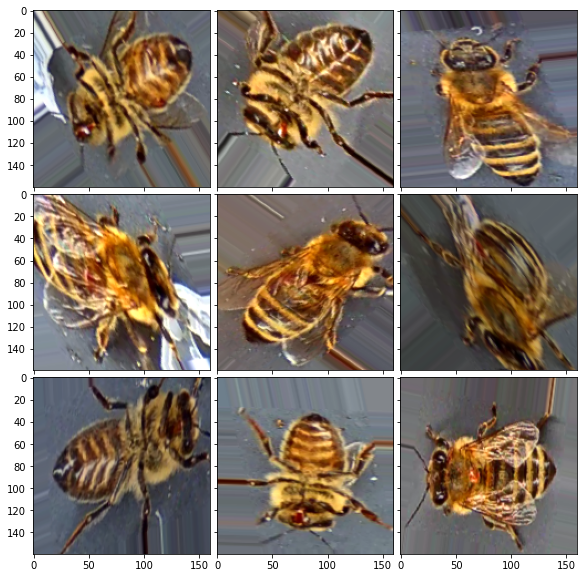

In [601]:
images, labels = train_generator.next()
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3),  axes_pad=0.1)
for ax, im in zip(grid, images):
    ax.imshow(im.astype('uint8'))

In [602]:
fig.savefig('results/pictures/data_augmentation.png', dpi=200, bbox_inches='tight')

# Explainability

In [657]:
model = keras.models.load_model('models/160_160_3_mobilenetv2/model')
data_generator = ImageDataGenerator().flow_from_directory(
        'data/train',
        target_size=(160, 160),
        batch_size=8,
        class_mode='binary',
        shuffle=True,
        seed=42
        )

Found 5319 images belonging to 2 classes.


In [617]:
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

occlusion_sensitivity_explainer = OcclusionSensitivity()

[[False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]]
[0. 1. 1. 1. 1. 1. 0. 0.]


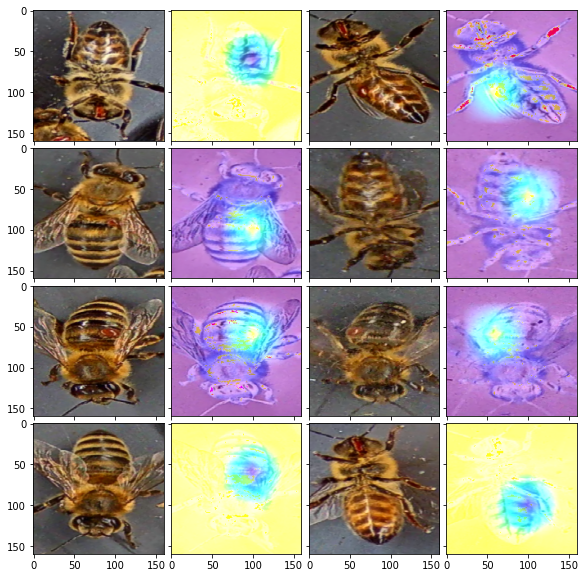

In [666]:
images, labels = data_generator.next()

plot_images = []
for i in range(len(images)):
    image = images[i]
    plot_images.append(image)
    explained = occlusion_sensitivity_explainer.explain(([image], None), model, class_index=0, patch_size=40)
    plot_images.append(explained)

print(model.predict(images) > 0.5)
print(labels)
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4),  axes_pad=0.1)
for ax, im in zip(grid, plot_images):
    ax.imshow(im.astype('uint8'), cmap='rainbow')

In [667]:
fig.savefig('results/pictures/occlusion_sensitivity.png', dpi=200, bbox_inches='tight')

# Curves

## ROC

In [689]:
test_predictions = predictions.loc[predictions['set'] == 'test']
all_roc_curves = {}
for model_name in model_names:
    all_roc_curves[model_name] = roc_curve(test_predictions['truth'], test_predictions[model_name])

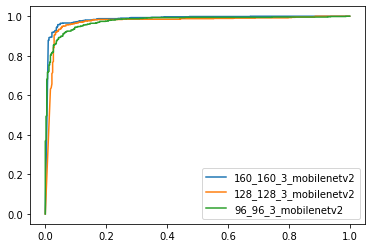

In [695]:
for model_name in model_names:
    plt.plot(all_roc_curves[model_name][0], all_roc_curves[model_name][1], label=model_name)
plt.legend()
plt.savefig('results/pictures/roc_curves.png', dpi=200, bbox_inches='tight')

## Precision-Recall

In [680]:
test_predictions = predictions.loc[predictions['set'] == 'test']
all_precision_recall_curves = {}
for model_name in model_names:
    all_precision_recall_curves[model_name] = precision_recall_curve(
        test_predictions['truth'], test_predictions[model_name])

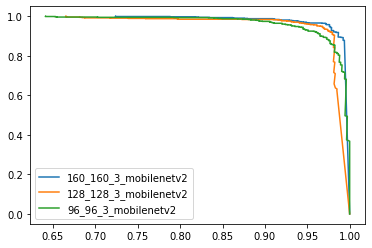

In [696]:
for model_name in model_names:
    plt.plot(all_precision_recall_curves[model_name][0], all_precision_recall_curves[model_name][1], label=model_name)
plt.legend()
plt.savefig('results/pictures/precision_recall_curves.png', dpi=200, bbox_inches='tight')